## Challenge Description 
  
In the current version of the supply chain, we have manually grouped the items into a few categories
intuitively. 
However, they now have a lot of data about product purchase history. Therefore, they would like to 
put the data into use!

This is what they asked you to do: 

1. The company founder wants to meet with some of the best products to go through a 
focused demand management. You are asked to send the ID of the following products to the 
founder: 

o Top 5 percentile of the products that bought the most items overall in their
lifetime

o For each item, the product that bought that item the most

o Which are the top 3 most expensive products to manufacture?

2. Find out the correlation between Lead Time and Cost. Do items with higher Lead Time
cost more than the items with Low Lead Time? 

3. If we want to focus on reducing Lead Time of items by placing them on certain specialty
programs. Which parts should we focus on? 
  
4. Cluster items based on products co-purchase history. That is, create clusters of items
that have the highest probability of being bought together. The goal of this is to replace
the old/manually created categories with these new ones. Each item can belong to just
one cluster.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets

items = pd.read_csv('item_to_id.csv',encoding='mbcs') # File is ANSI encoding
purchase_history = pd.read_csv('purchase_history.csv') # File is UTF-8 encoding

In [3]:
# View the top 5 rows from the first dataset

items.head()

,Item_name,Item_id,cost,lead_time
0,CABLE 1,43,34.11,71
1,CABLE 2,23,366.26,72
2,CABLE 3,38,20.19,65
3,CABLE 4,9,64.02,89
4,HEXÊNUT,39,2.50,46


In [4]:
# View the top 5 rows from the second dataset

purchase_history.head()

,product_id,id
0,222087,"27,26"
1,1343649,"6,47,17"
2,404134,"18,12,23,22,27,43,38,20,35,1"
3,1110200,"9,23,2,20,26,47,37"
4,224107,"31,18,5,13,1,21,48,16,26,2,44,32,20,37,42,35,4..."


In [5]:
# Data types in the first dataset
items.dtypes

Item_name     object
Item_id        int64
cost         float64
lead_time      int64
dtype: object

In [6]:
# Data type in the second dataset
purchase_history.dtypes

product_id     int64
id            object
dtype: object

In [7]:
# We noticed in the second table, each row has multiple items in the id column that are comma seperated. 
# We will first transform the data into vertical format for easier data anlaytics.

# Split the column and save as a list
purchase_history['id'] = purchase_history['id'].str.split(',')

# Convert each row into multiple rows
purchase_history = purchase_history.explode('id')
purchase_history.head()

# Convert data type to int for id column
purchase_history['id'] = purchase_history.id.astype(int)

In [8]:
# Transformed
purchase_history.head()

,product_id,id
0,222087,27
0,222087,26
1,1343649,6
1,1343649,47
1,1343649,17


## Question 1: The company founder wants to meet with some of the best products to go through a focused demand management. You are asked to send the ID of the following products to the founder

### 1.1: Top 5 percentile of the products that bought the most items overall in their lifetime

Assumption: 
1. The data set contains the entire history of items lifetime purchases.

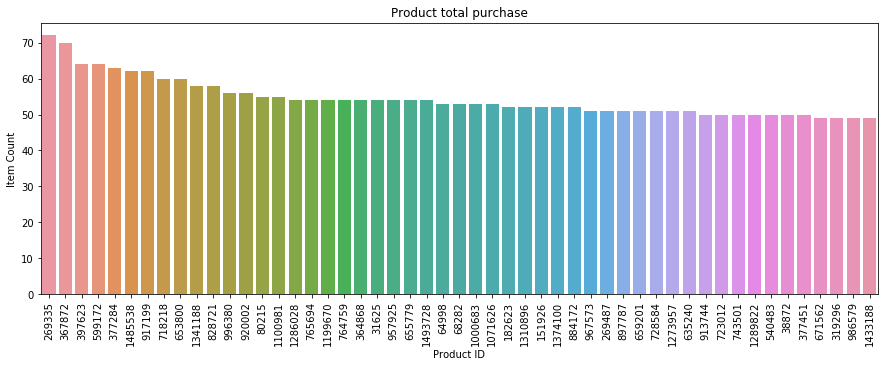

In [9]:
# Group the purchase history table by product_id

purchase_grouped = purchase_history.groupby(by="product_id").count().sort_values("id",ascending = False).reset_index(drop = False)
purchase_grouped.rename(columns = {"id":"Item_Cnt"}, inplace = True)

# Bar plot to visualize top 50 products

Product = purchase_grouped.loc[0:50,'product_id'].astype(str)
Count = purchase_grouped.loc[0:50,'Item_Cnt']

# Create bar plot
plt.figure(figsize=(15, 5))
sns.barplot(x=Product, y=Count)

plt.xlabel('Product ID')
plt.ylabel('Item Count')
plt.title('Product total purchase')

plt.xticks(rotation=90)

plt.show()

In [10]:
# Metrics and calculations
print("Total number of products: ",len(purchase_grouped))
print("Total items bought (includes duplicates): ", sum(purchase_grouped.iloc[:,1]))
print()

print("Top 5 percentile of products: ",round(len(purchase_grouped)*0.05))
print("Total items bought by top 5% of products", sum(purchase_grouped.iloc[0:1244,1]))
print()

print("Total percentage of purchases from top 5% products", round(sum(purchase_grouped.iloc[0:1244,1])*100/sum(purchase_grouped.iloc[:,1]),2),"%")

Total number of products:  24885
Total items bought (includes duplicates):  319995

Top 5 percentile of products:  1244
Total items bought by top 5% of products 44276

Total percentage of purchases from top 5% products 13.84 %


In [11]:
# List of products to share
top_products = purchase_grouped.iloc[0:1244,0]
top_products.head()

0    269335
1    367872
2    397623
3    599172
4    377284
Name: product_id, dtype: int64

### 1.2: For each item, the product that bought that item the most

In [12]:
# Group the data by (item) id, then by product_id
purchase_history['Count'] = 1
purchase_grouped2 = purchase_history.groupby(by = ['id','product_id']).sum()

# Select the product that bought each item the most
product_most_bought = purchase_grouped2.loc[purchase_grouped2.groupby(['id'])['Count'].idxmax()].reset_index()


In [13]:
# Data clean ups 

# Join with the first table to get the item name column
items.rename(columns = {"Item_id":"id"}, inplace = True)
product_most_bought = product_most_bought.merge(items[["Item_name","id"]], how = "left", on = "id")

# Sort by item id
product_most_bought.sort_values(['id'], ascending = True, inplace = True)

# Rename column name
product_most_bought.rename(columns = {"id":"item"}, inplace = True)

product_most_bought

,item,product_id,Count,Item_name
0,1,31625,4,TAPEÊSOFTWARE
1,2,31625,5,RING
2,3,154960,4,INSULATOR
3,4,5289,3,SHAFT
4,5,217277,3,ROBOT
5,6,334664,4,SensorÊBoard
6,7,175865,3,WAFERÊRING
7,8,151926,3,ACTUATORÊMOUNT
8,9,269335,4,CABLE 4
9,10,618914,4,CeramicÊe-chuck


### 1.3: Which are the top 3 most expensive products to manufacture?

Assumptions:

1. Each line in the purchase history table contain all items used in the corresponding product
2. Each item only use 1 piece (QPA = 1) in each product
3. Cost column is the unit price for items, no unit of measure conversion is required

In [14]:
del purchase_history['Count']

# Add the purchase order column, each purchase order represents a row from the original data set
purchase_history = purchase_history.reset_index().rename(columns = {"index":"purchase_order"})

# Join the items table
purchase_history = purchase_history.merge(items, how = "left", on = "id")

# Calculate cost per purchase order
purchase_grouped3 = purchase_history[['purchase_order','product_id','cost']].groupby(by = ['purchase_order','product_id']).sum()

In [15]:
# Select one cost / purchase order per each product (max value)
product_cost = purchase_grouped3.loc[purchase_grouped3.groupby(['product_id'])['cost'].idxmax()].reset_index()
product_cost.sort_values(by = 'cost', ascending = False, inplace = True)

# Show the top 3 products with highst cost
product_cost[0:3].reset_index(drop = True)

,purchase_order,product_id,cost
0,6152,117684,142846.90
1,5630,953725,142612.27
2,21214,743746,142084.93


## Question 2: Find out the correlation between Lead Time and Cost. Do items with higher Lead Time cost more than the items with Low Lead Time?

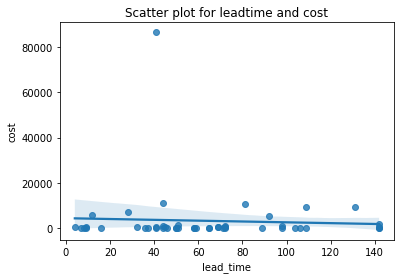

In [16]:
# Plot scatter plot using Seaborn
sns.regplot(x=items['lead_time'], y=items['cost'], data=items[["lead_time","cost"]])

plt.title('Scatter plot for leadtime and cost')
plt.show()

In [17]:
# Check the correlation coefficient using Pandas function (Pearson method)

correlation = items['lead_time'].corr(items['cost'])
round(correlation,3)

-0.056

There is a very weak correlation between leadtime and cost, since the absolute value of correlation coefficient is less than 0.19. 

## Question 3: If we want to focus on reducing Lead Time of items by placing them on certain specialty programs. Which parts should we focus on?

We just tested that cost has a very week correlation with leadtime. So cost is not a good variable to identify items needs leadtime improvements. 

I am approaching the problem from below aspects:

1. Items with high leadtime, select the items with leadtime greater than 75 percentile.
2. Items that we frequently purchase.
3. Look at items bought together that has a big variance of leadtime. Reducing those high lead time items will greatly help reduce the overall wait time to start production. 

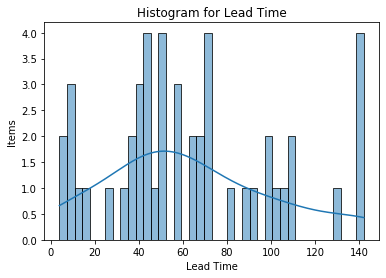

In [18]:
# Create a histogram using Seaborn
LT = items['lead_time']
sns.histplot(data = LT, bins=40, kde=True)

plt.xlabel('Lead Time')
plt.ylabel('Items')
plt.title('Histogram for Lead Time')

plt.show()

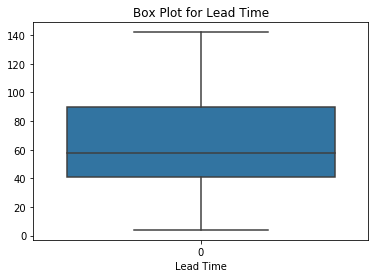

In [19]:
# Create a box plot using Seaborn
sns.boxplot(data = LT)

plt.xlabel('Lead Time')
plt.title('Box Plot for Lead Time')

plt.show()

In [20]:
print("75 percentile of lead time: ",np.percentile(LT, [25, 50, 75])[2])

75 percentile of lead time:  89.75


In [21]:
# High leadtime items
items_high_LT = items.loc[items['lead_time']>89.75].reset_index(drop = True).sort_values(by = 'lead_time', ascending = False)
items_high_LT.reset_index(drop = True)

,Item_name,id,cost,lead_time
0,ADAPTOR,16,340.08,142
1,CHOKE,47,57.38,142
2,THERMO-SWITCH,24,1878.81,142
3,SHAFT,4,77.78,142
4,CONTROLLERÊ,36,9270.45,131
5,RING,2,141.05,109
6,HEATER,18,9293.58,109
7,LABEL,12,16.28,106
8,WAFERÊRING,7,141.05,104
9,CeramicÊe-chuck,10,869.67,98


I would suggest the leadership to prioritize on the above items as part of the speciaty program of tackling items with high lead times. 

In [22]:
# What are items we frequently purchase and what are the leadtimes

purchase_grouped4 = purchase_history[["id","product_id","lead_time"]].groupby(by = ['id']).agg({'product_id':'count','lead_time':'max'}).rename(columns = {"product_id":"times_purchased"}).sort_values('times_purchased', ascending = False)
purchase_grouped4.head()

,times_purchased,lead_time
id,,
2,14473,109
1,9119,36
42,9050,41
25,9019,9
32,9008,58


I would suggest us also prioritize the items that are most frequently purchased, generally speaking reducing the lead time for these items will be more benefitial since the order frequency is higher.

In [23]:
# Find the min and max LT item within each purchase order

max_LT_in_PO = purchase_history.loc[purchase_history.groupby(['purchase_order'])['lead_time'].idxmax(),['purchase_order','id','Item_name','lead_time']]
min_LT_in_PO = purchase_history.loc[purchase_history.groupby(['purchase_order'])['lead_time'].idxmin(),['purchase_order','id','Item_name','lead_time']]

PO_LT_min_max = max_LT_in_PO.merge(min_LT_in_PO, how = 'left', on = 'purchase_order')

In [24]:
# Select top orders with a delta between min and max LT

PO_LT_min_max.rename(columns = {"id_x":"Max_LT_Item","Item_name_x":"Max_LT_Item_Name","lead_time_x":"Max_LT","id_y":"Min_LT_Item","Item_name_y":"Min_LT_Item_Name","lead_time_y":"Min_LT"}, inplace = True)

PO_LT_min_max['LT_Difference'] = (PO_LT_min_max['Max_LT'] - PO_LT_min_max['Min_LT'])
PO_LT_min_max.sort_values('LT_Difference', ascending = False).groupby(['Max_LT_Item','Max_LT_Item_Name','Min_LT_Item','Min_LT_Item_Name','Max_LT','Min_LT']).min().sort_values('LT_Difference', ascending = False)[0:10]

,,,,,,purchase_order,LT_Difference
Max_LT_Item,Max_LT_Item_Name,Min_LT_Item,Min_LT_Item_Name,Max_LT,Min_LT,,
16,ADAPTOR,35,PLATEÊQUARTZ,142,4,4,138
4,SHAFT,35,PLATEÊQUARTZ,142,4,92,138
24,THERMO-SWITCH,35,PLATEÊQUARTZ,142,4,38,138
47,CHOKE,35,PLATEÊQUARTZ,142,4,99,138
24,THERMO-SWITCH,15,WAFERÊSENSOR,142,7,111,135
16,ADAPTOR,15,WAFERÊSENSOR,142,7,86,135
47,CHOKE,15,WAFERÊSENSOR,142,7,6,135
4,SHAFT,15,WAFERÊSENSOR,142,7,143,135
24,THERMO-SWITCH,41,SPACER,142,8,194,134


All of the orders which has a hightest leadtime difference among items shows the maximum leadtime is due to items with lead time = 142 days. The result ties back to the anlaysis of items with highest lead time, which further proves the benefit of reducing lead time for these outstanding items. 

## Question 4: Cluster items based on products co-purchase history. That is, create clusters of items that have the highest probability of being bought together. The goal of this is to replace the old/manually created categories with these new ones. Each item can belong to just one cluster.

Algorithm: K Means and Hierarchical Clustering

Summary: For the given problem, K Means algorithm tends to cluster individual items into each cluster and keep all remaining items in one cluster, which is not ideal behavior for the exercise; Hierarchical Clustering algorthim provides a detailed and layered output, where user could determine the level and granunarity from the result base on business needs. 

I would recommend to use the result from Hierarchical Clustering algorithm, for more flexibility and potentially higher accuracy since Hierarchical Clustering works better than K Means on smaller data size in general. 

In [25]:
# We use the sklearn KMeans module for ML
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [26]:
# Data preparation

# Convert purchase history to binary matrix
# Each row stands for a purchase order
# Each column stands for an item
# Value 1 stands for purchased item, 0 stands for not purchased item

purchase_history_binary = pd.get_dummies(purchase_history[['purchase_order','id']].set_index('purchase_order')['id']).max(level=0)
purchase_history_binary = purchase_history_binary.astype(int)

purchase_history_binary.head()

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
purchase_order,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,1,1,0,0,1,0,1,0,0,0,...,0,1,0,1,0,1,0,0,1,1


In [27]:
purchase_history_binary.shape

(39474, 48)

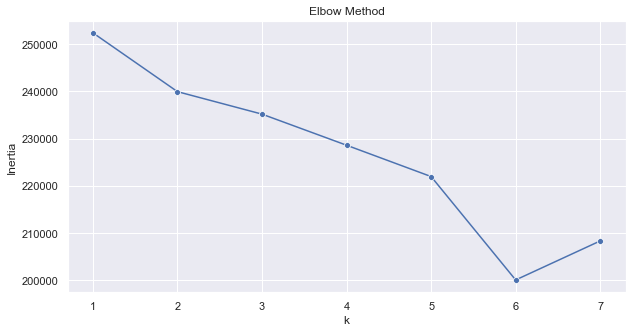

In [28]:
# Use elbow method to determine optimum k

# Data to be used
X = purchase_history_binary.transpose() 

# Range of k values
k_values = range(1, 8)

# Initialize list to store inertia values
inertia_values = []

# Calculate inertia for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)
    
    #print("k = ",k,", Silhouette Score = ",round(silhouette_score(X, kmeans.labels_),2))

# Plotting using Seaborn
sns.set() #style='whitegrid'
plt.figure(figsize=(10, 5))
sns.lineplot(x=k_values, y=inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

In [29]:
k = 6

# Create KMeans model
kmeans = KMeans(n_clusters=k)

# Fit the model
X = purchase_history_binary.transpose()
kmeans.fit(X)

# Get cluster labels for each item
labels = kmeans.labels_

# Get cluster centers for each cluster
centers = kmeans.cluster_centers_

In [30]:
# Model evaluation

# Sum of squares
# Sum of squared distance within each cluster
print("Inertia: ", round(kmeans.inertia_))

# Silhouette Score 
# Silhouette score measures the cohesion and separation of the clusters
print("Silhouette Score: ", round(silhouette_score(X, kmeans.labels_),2))


Inertia:  215136
Silhouette Score:  0.05


In [31]:
Item_cluster = {'item': purchase_grouped4.reset_index().loc[:,'id'],
                      'cluster': labels}
Item_cluster = pd.DataFrame(Item_cluster)

In [32]:
Item_cluster = Item_cluster.sort_values(by = 'item').reset_index(drop = True)
Item_cluster

,item,cluster
0,1,3
1,2,1
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,2
8,9,0
9,10,0


In [33]:
#Item_cluster.groupby(by = 'cluster').count()

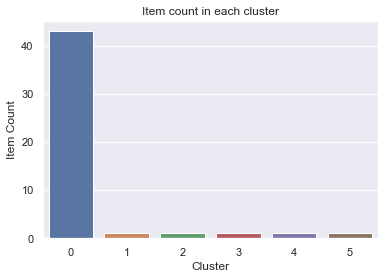

In [34]:
# Bar plot to visualize the clusters properties

Cluster = Item_cluster.groupby(by = 'cluster').count().reset_index()['cluster']
Count = Item_cluster.groupby(by = 'cluster').count()['item']

# Create bar plot
sns.barplot(x=Cluster, y=Count)

plt.xlabel('Cluster')
plt.ylabel('Item Count')
plt.title('Item count in each cluster')

plt.show()

In [35]:
# Hierarchical clustering

In [36]:
# Principal component anlaysis for dimentioanl reduction
from sklearn.decomposition import PCA

X = purchase_history_binary.transpose()

# Initialize PCA with desired number of components
n_components = 48
pca = PCA(n_components=n_components)

# Fit PCA to data
pca.fit(X)

# Transform data to principal components
X_pca = pca.transform(X)

# Print explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [6.39611130e-02 4.46685608e-02 4.10539414e-02 4.04792747e-02
 3.65820338e-02 3.07447410e-02 2.78489605e-02 2.63489787e-02
 2.55785677e-02 2.30058604e-02 2.29602902e-02 2.28974878e-02
 2.26673638e-02 2.25768399e-02 2.24278616e-02 2.22616803e-02
 2.21733820e-02 2.20727085e-02 2.20294754e-02 2.19124407e-02
 2.17597318e-02 2.16872161e-02 2.16147821e-02 2.13256722e-02
 2.11522192e-02 2.10373781e-02 2.07839433e-02 1.76658466e-02
 1.74020963e-02 1.68659867e-02 1.68430143e-02 1.67404374e-02
 1.64732451e-02 1.64131784e-02 1.62338051e-02 1.47077923e-02
 1.31622518e-02 1.15705366e-02 1.09833060e-02 1.09133813e-02
 1.08747072e-02 1.07192469e-02 1.06298385e-02 1.05208319e-02
 9.37430655e-03 9.28456827e-03 9.00911780e-03 2.55075805e-30]


In [37]:
pd.DataFrame(X_pca)

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,12.088124,-1.750072,1.741835,-1.295921,2.011778,41.307373,16.253915,55.353304,29.616511,-0.061364,...,-0.611392,0.067853,0.082181,0.268452,-0.149559,-0.359447,-0.459917,-0.206036,-0.093495,-8.983828e-13
1,68.485415,-26.336055,-15.607125,-5.623959,-1.408793,50.206647,-7.265191,-29.804432,-24.887974,-0.302388,...,-0.102489,-0.057040,-0.422946,0.280230,0.430078,0.036416,-0.020078,0.015595,0.141761,-1.083427e-12
2,2.245891,-3.395926,-2.207133,-1.979563,1.014474,23.138282,2.454061,17.819299,-1.607216,-3.316860,...,0.446476,-0.218199,0.413157,0.372985,-0.220409,-0.083702,0.253210,0.042430,0.630210,-1.954611e-13
3,-18.673172,-2.784366,-4.008399,-1.463560,-1.141239,4.835279,0.485928,3.971812,-7.363079,-3.190306,...,-5.533811,0.102889,0.083150,-1.784431,1.237130,-3.158261,-0.868791,1.779809,-1.093821,-4.686746e-13
4,-21.587352,-2.496207,-3.700960,-1.690607,-2.621250,1.570160,1.698172,3.074143,-8.223425,-1.209475,...,4.875495,3.249375,-1.741414,-1.143921,-1.428873,0.994128,-32.936928,-15.279294,-16.917173,-2.568929e-13
5,9.546067,-1.455847,8.802020,-4.544529,52.114303,-8.275237,-2.934196,-0.585130,0.083102,0.204538,...,-0.286240,0.358381,0.075208,0.448211,-0.040820,-0.259735,-0.014049,0.166616,-0.182606,-1.805067e-13
6,-19.816486,-2.959163,-3.854956,-2.158765,-1.585058,1.059877,1.808720,1.184125,-10.673565,-1.844237,...,21.382759,10.808211,27.105706,-12.813529,23.277521,1.710639,-0.489467,2.316669,-0.169889,2.023819e-13
7,-11.846977,-3.043629,-3.094249,1.040817,-1.499414,4.875807,-26.025948,-7.903013,17.069325,2.832390,...,-0.464708,-0.001844,0.858762,-0.184784,-0.783824,0.383840,-0.399078,-0.395220,-0.496967,2.060773e-13
8,12.369087,0.813887,39.414169,-21.767294,-14.288571,-4.926465,-1.106665,0.421025,-2.699112,-7.212907,...,0.339956,-0.386095,-0.103399,-0.263324,-0.148578,0.396454,0.053288,0.281174,-0.218641,1.483932e-13
9,22.652969,-22.877961,-22.334078,-8.096647,-9.765142,-22.678165,-1.352192,8.452082,2.418834,1.787567,...,0.560139,0.225116,0.069312,-0.091668,0.004601,-0.240739,-0.473814,0.211675,-0.145174,-3.555233e-13


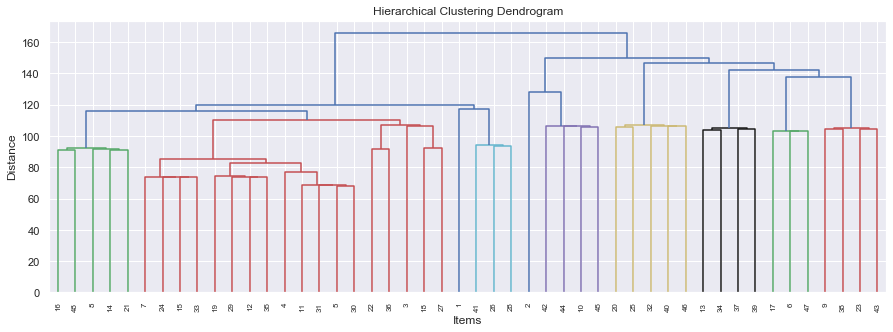

In [39]:
# Ref: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# Sample data
X = X_pca

# Perform hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(X)

# Plot dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # Create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix,labels=range(1, len(X_pca)+1), **kwargs)

plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
# Plot the dendrogram for the model
plot_dendrogram(agg_clustering, truncate_mode='level', p=20)
plt.xlabel('Items')
plt.ylabel('Distance')
plt.show()


By performing visual inspection on the Hierarchical Clustering Dendrogram, we can see that the items are first clustered into 2 major groups, then clustered into multiple smaller groups within each group. 

For the new classification of items, we could do a two-level classification which includes a "main category" and a "sub-category". This will enable different cross-functional teams to use the data as each team may have different expectations and requirements.

For the "main cateogory", if we draw a horizontal line on the Dendrogram at Distance = 160, this will classify all items into 2 groups. For the "sub-category", we can draw a line at Distance = 110, this will further break down the items into 11 sub-groups.

Particularly for the item groups that merges at smaller distances, we could say that these items have higher possibility to be bought together. 